In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as plb

import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline

pd.options.display.max_columns=None

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df=pd.read_csv(r"./auto.csv")

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
'''WE NOTICE THAT THE COLUMN HEADERS ARE MISSING SO WE ADD HEADERS TO OUR DATASET'''

headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
'''WE NOW TRY GETTING A BRIEF INFORMATION ON THE STATISTICAL SUMMARY OF OUR DATASET AS WELL AS INFORMATION ABOUT ITS DATA TYPE'''

df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204,204,204,204,204,204,204,204,204.000000,204.000000,204.000000,204.000000,204.000000,204,204,204.000000,204,204,204,204.000000,204,204,204.000000,204.000000,204
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,186
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,40,32,184,167,114,96,120,201,NaN,NaN,NaN,NaN,NaN,148,158,NaN,93,23,20,NaN,19,37,NaN,NaN,4
mean,0.823529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.806373,174.075000,65.916667,53.749020,2555.602941,NaN,NaN,126.892157,NaN,NaN,NaN,10.148137,NaN,NaN,25.240196,30.769608,NaN
std,1.239035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.994144,12.362123,2.146716,2.424901,521.960820,NaN,NaN,41.744569,NaN,NaN,NaN,3.981000,NaN,NaN,6.551513,6.898337,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.075000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.575000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,119.500000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.200000,66.900000,55.500000,2939.250000,NaN,NaN,142.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.500000,NaN


In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
'''WE OBSERVE THAT SOME DATA TYPES ARE MISIDENTIFIED. LET IT REMAIN AS IT IS FOR THE TIME BEING'''

'WE OBSERVE THAT SOME DATA TYPES ARE MISIDENTIFIED. LET IT REMAIN AS IT IS FOR THE TIME BEING'

In [8]:
'''WRANGLING THE DATA'''

#WE NOW CHECK FOR NULL VALUES AND WORK ON RESOLVING THEM

df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
missing=df.isnull()
#TRUE means missing value while FALSE means available value
missing.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")

symboling
False    204
Name: symboling, dtype: int64

normalized-losses
False    164
True      40
Name: normalized-losses, dtype: int64

make
False    204
Name: make, dtype: int64

fuel-type
False    204
Name: fuel-type, dtype: int64

aspiration
False    204
Name: aspiration, dtype: int64

num-of-doors
False    202
True       2
Name: num-of-doors, dtype: int64

body-style
False    204
Name: body-style, dtype: int64

drive-wheels
False    204
Name: drive-wheels, dtype: int64

engine-location
False    204
Name: engine-location, dtype: int64

wheel-base
False    204
Name: wheel-base, dtype: int64

length
False    204
Name: length, dtype: int64

width
False    204
Name: width, dtype: int64

height
False    204
Name: height, dtype: int64

curb-weight
False    204
Name: curb-weight, dtype: int64

engine-type
False    204
Name: engine-type, dtype: int64

num-of-cylinders
False    204
Name: num-of-cylinders, dtype: int64

engine-size
False    204
Name: engine-size, dtype: int64

fuel-system
Fa

In [11]:
''' In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data.'''

avg_nl=df['normalized-losses'].astype('float').mean(axis=0)
print("Average for Normalized Losses = ",avg_nl)
df['normalized-losses'].replace(np.nan, avg_nl, inplace=True)
df.head()

Average for Normalized Losses =  122.0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [12]:
#NUMBER OF DOORS IS OBJECT TYPE DO IT NEEDS TO DEALT IN A DIFFERENT MANNER

print("Value Counts = \n",df['num-of-doors'].value_counts())
print("")
print("Max value = ",df['num-of-doors'].value_counts().idxmax())

Value Counts = 
 four    114
two      88
Name: num-of-doors, dtype: int64

Max value =  four


In [13]:
df['num-of-doors'].replace(np.nan, "four", inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [14]:
#AVERAGE OF BORE

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average Bore = ",avg_bore)
df['bore'].replace(np.nan, avg_bore, inplace=True)




#AVERAGE OF STROKE

avg_stroke=df['stroke'].astype('float').mean(axis=0)
print("Average Stroke = ",avg_stroke)
df['stroke'].replace(np.nan, avg_bore, inplace=True)




#AVERAGE OF HORSE POWER

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)




#AVERAGE OF PEAK-RPM

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average Bore =  3.3290500000000014
Average Stroke =  3.258299999999994
Average horsepower: 104.22277227722772
Average peak rpm: 5125.990099009901


In [15]:
df.dropna(subset=['price'], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [16]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [17]:
'''REPAIRING THE DATA TYPES OF OUR DATASET'''

'REPAIRING THE DATA TYPES OF OUR DATASET'

In [18]:
df[["price", "bore", "stroke"]]=df[["price", "bore", "stroke"]].astype("float")
df[["normalized-losses"]]=df[["normalized-losses"]].astype("int")
df[["peak-rpm"]]=df[["peak-rpm"]].astype("float")

In [19]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [20]:
'''DATA STANDARDIZATION'''

'DATA STANDARDIZATION'

In [21]:
# Convert city-mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km']=235/df['city-mpg']

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


In [23]:
'''NORMALIZING THE DATA'''


# replace (original value) by (original value)/(maximum value)
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()

Text(0.5, 1.0, 'HORSEPOWER BINS')

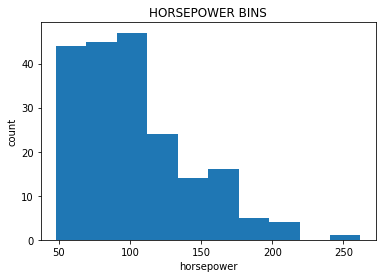

In [24]:
'''Binning'''


df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("HORSEPOWER BINS")

In [25]:
#We would like 3 bins of equal size bandwidth
start=df["horsepower"].min()
print("start = ",start)
print("")

end=df["horsepower"].max()
print("end = ",end)
print("")


num_bin=4

bins=np.linspace(start,end,num_bin)
print("bins = ",bins)
print("")

grp_name=['low', 'medium', 'high']

df['binned_hp']=pd.cut(df['horsepower'], bins, labels=grp_name, include_lowest=True)
df[['horsepower', 'binned_hp']].head(20)

start =  48

end =  262

bins =  [ 48.         119.33333333 190.66666667 262.        ]



,horsepower,binned_hp
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low
5,110,low
6,110,low
7,140,medium
8,101,low
9,101,low


In [26]:
df['binned_hp'].value_counts()

low       152
medium     43
high        5
Name: binned_hp, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

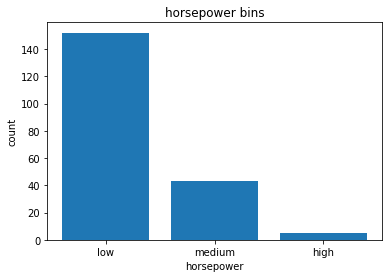

In [27]:
plt.bar(grp_name, df['binned_hp'].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

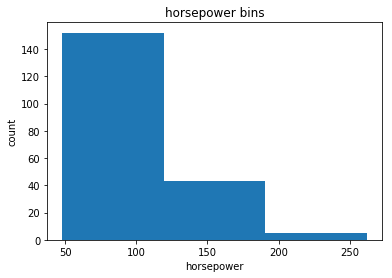

In [28]:
plt.hist(df["horsepower"], bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [29]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'binned_hp'],
      dtype='object')

In [30]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
dummy_variable_1.rename(columns={'fuel-type-gas':'gas','fuel-type-diesel':'diesel'}, inplace=True)

In [32]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [33]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,binned_hp,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,low,0,1


In [34]:
df.to_csv('clean_df.csv')

In [35]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'binned_hp', 'diesel', 'gas'],
      dtype='object')

In [36]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
binned_hp            category
diesel                  uint8
gas                     uint8
dtype: object

In [37]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145790,0.015932,-0.181073,0.074617,0.284033,-0.030158,0.041248,-0.083327,0.062423,-0.195381,0.195381
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029929,0.059595,-0.114738,0.217322,0.239580,-0.225255,-0.182011,0.133999,0.238712,-0.101574,0.101574
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501576,0.142006,0.249689,0.375610,-0.365045,-0.480029,-0.552211,0.589147,0.484047,0.306706,-0.306706
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610847,0.118956,0.159203,0.580583,-0.286688,-0.667658,-0.700186,0.691044,0.659174,0.210616,-0.210616
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548485,0.182351,0.189008,0.617115,-0.247337,-0.638155,-0.684700,0.752795,0.677111,0.243448,-0.243448
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187917,-0.088873,0.259526,-0.085829,-0.315820,-0.057087,-0.111568,0.137284,0.008923,0.281198,-0.281198
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644552,0.167329,0.156444,0.758076,-0.279422,-0.750390,-0.795515,0.834420,0.785868,0.221082,-0.221082
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572878,0.202128,0.029005,0.822689,-0.256681,-0.651002,-0.679877,0.872337,0.745337,0.070925,-0.070925
bore,-0.145790,-0.029929,0.501576,0.610847,0.548485,0.187917,0.644552,0.572878,1.000000,-0.051078,0.002034,0.566807,-0.267061,-0.581272,-0.590672,0.543433,0.553954,0.055395,-0.055395
stroke,0.015932,0.059595,0.142006,0.118956,0.182351,-0.088873,0.167329,0.202128,-0.051078,1.000000,0.185823,0.101574,-0.057666,-0.046471,-0.045257,0.083153,0.048598,0.238427,-0.238427


In [38]:
#WE OBSERVE THAT CORRELATION BETWEEN PRICE AND ENGINE-SIZE IS QUITE HIGH
df[['price','engine-size']].corr()

,price,engine-size
price,1.000000,0.872337
engine-size,0.872337,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 56462.05966203031)

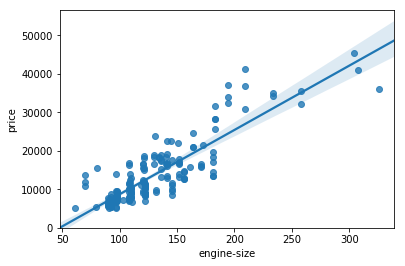

In [39]:
#CORRELATION DOES NOT IMPLY CAUSALITY
#LET US CHECK IF THE REGRESSION PLOT IS IN AGREEMENT WITH THE ABOVE CORRELATION
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [40]:
#Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [41]:
#Highway mpg is a potential predictor variable of price
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


(0, 48278.90085188759)

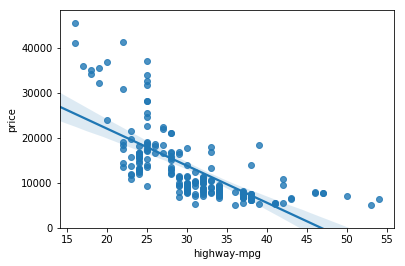

In [42]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [43]:
#As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. 
#Highway mpg could potentially be a predictor of price.

In [44]:
df[["normalized-losses","price"]].corr()

,normalized-losses,price
normalized-losses,1.000000,0.133999
price,0.133999,1.000000


In [45]:
y=df[["normalized-losses","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

Correlation between the two is :  0.1339991760564203


(0, 47436.14592287527)

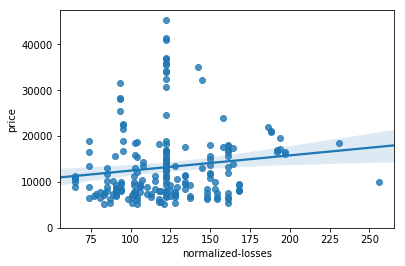

In [46]:
sns.regplot(x="normalized-losses",y="price", data=df)
plt.ylim(0,)

In [47]:
y=df[["wheel-base","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

Correlation between the two is :  0.5891470005448706


(0, 47727.36704332145)

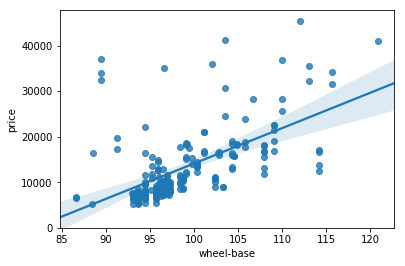

In [48]:
sns.regplot(x="wheel-base", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.6910440897821899


(0, 47986.53323425408)

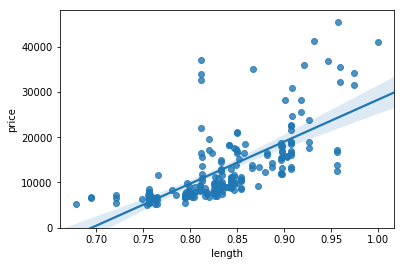

In [49]:
#LENGTH AND PRICE
y=df[["length","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="length", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.752794863183261


(0, 48046.21778368043)

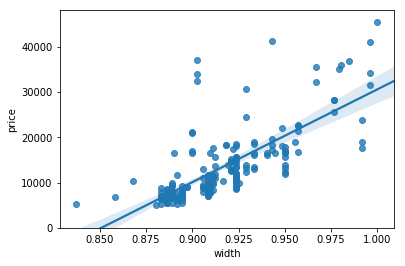

In [50]:
#WIDTH AND PRICE
y=df[["width","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="width", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.1372835252529061


(0, 47436.14592287527)

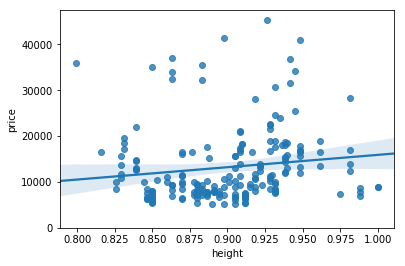

In [51]:
#height AND PRICE
y=df[["height","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="height", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.8344204348498458


(0, 47868.573564324535)

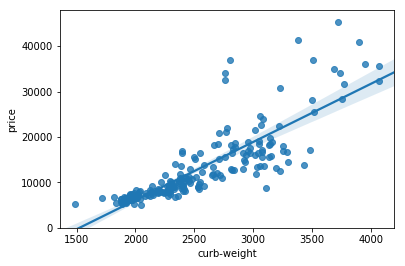

In [52]:
#curb-weight AND PRICE
y=df[["curb-weight","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="curb-weight", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.5434325935555675


(0, 47905.49881501285)

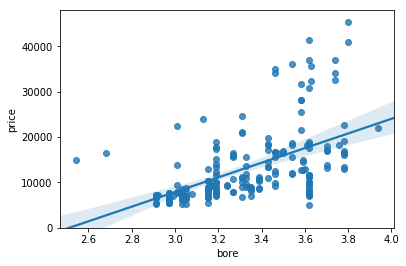

In [53]:
#bore AND PRICE
y=df[["bore","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="bore", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.0831526907100638


(0, 47436.14592287527)

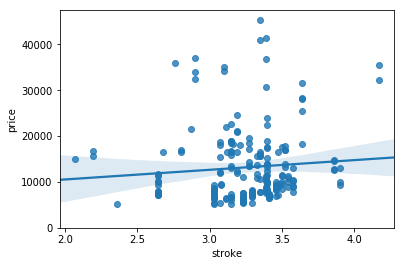

In [54]:
#stroke AND PRICE
y=df[["stroke","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.07117559170681714


(0, 47436.14592287527)

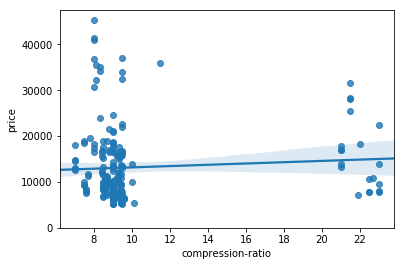

In [55]:
#compression-ratio AND PRICE
y=df[["compression-ratio","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="compression-ratio", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  0.8096565575365603


(0, 49699.1366843388)

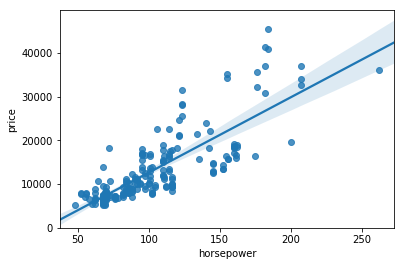

In [56]:
#horsepower AND PRICE
y=df[["horsepower","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  -0.10159275078207869


(0, 47436.14592287527)

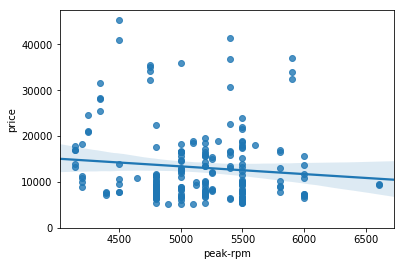

In [57]:
#peak-rpm AND PRICE
y=df[["peak-rpm","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Correlation between the two is :  -0.6871861020862684


(0, 48374.06861940354)

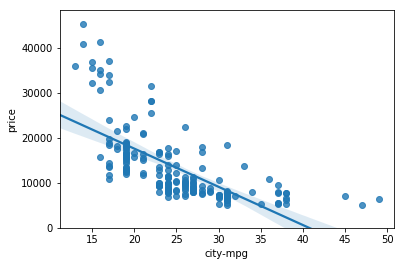

In [58]:
#city-mpg AND PRICE
y=df[["city-mpg","price"]].corr()
y.head()
print('Correlation between the two is : ',y.iloc[0,1])

sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

In [59]:
'''AMONGST THE VARIOUS NUMERICAL VARIABLES WE SPOTTED A FEW THAT ARE WORTH 
BEING A FEATURE FOR THE PRICE PREDICTION. NOW LET US PROCEED TOWARDS THE 
CATEGORICAL DATA TO LOOK OUT FOR THE SAME. '''

'AMONGST THE VARIOUS NUMERICAL VARIABLES WE SPOTTED A FEW THAT ARE WORTH \nBEING A FEATURE FOR THE PRICE PREDICTION. NOW LET US PROCEED TOWARDS THE \nCATEGORICAL DATA TO LOOK OUT FOR THE SAME. '

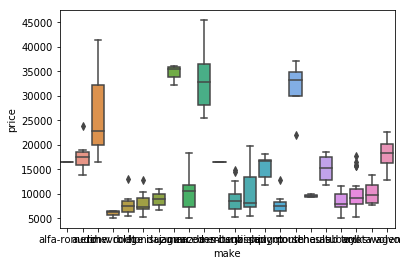

In [60]:
sns.boxplot(x="make", y="price", data=df)

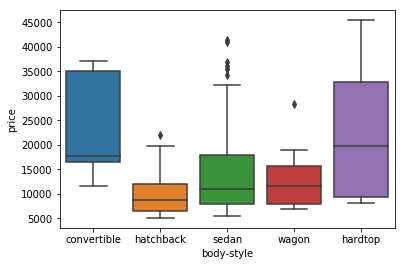

In [61]:
sns.boxplot(x="body-style", y="price",data=df)

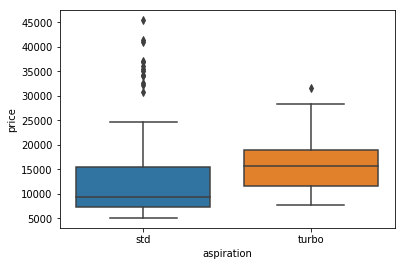

In [62]:
sns.boxplot(x="aspiration", y="price",data=df)

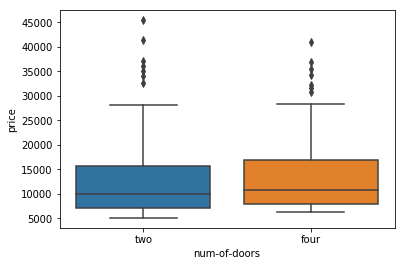

In [63]:
sns.boxplot(x="num-of-doors", y="price",data=df)

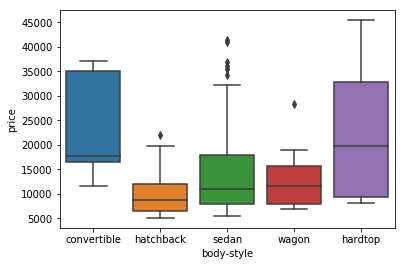

In [64]:
sns.boxplot(x="body-style", y="price",data=df)

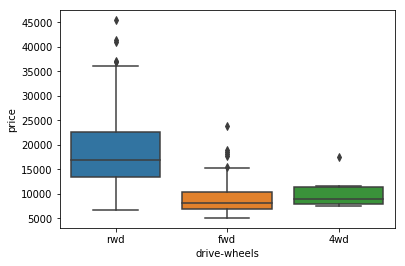

In [65]:
sns.boxplot(x="drive-wheels", y="price",data=df)  #good

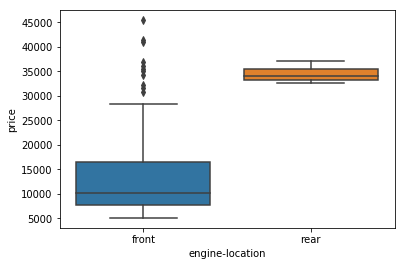

In [66]:
sns.boxplot(x="engine-location", y="price",data=df)  #good

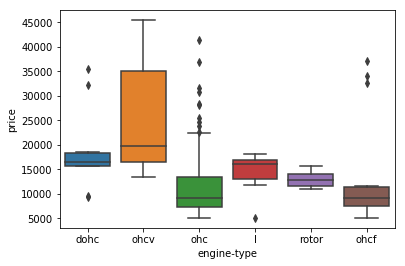

In [67]:
sns.boxplot(x="engine-type", y="price",data=df)

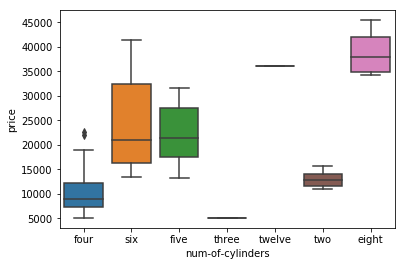

In [68]:
sns.boxplot(x="num-of-cylinders", y="price",data=df)

In [69]:
# DESCRIPTIVE STATISTICS ANALYSIS

In [70]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.329981,3.261231,10.170100,103.365000,5118.259901,25.200000,30.705000,13205.690000,9.937914,0.100000,0.900000
std,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314327,4.014163,37.455525,479.240743,6.432487,6.827227,7966.982558,2.539415,0.300753,0.300753
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5162.995050,24.000000,30.000000,10270.000000,9.791667,0.000000,1.000000
75%,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.368421,0.000000,1.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [71]:
df.describe(include =['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,200,200,200,200,200,200,200,200,200
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,164,115,94,118,197,145,156,91


In [72]:
# VALUE - COUNTS

In [73]:
df['drive-wheels'].value_counts()

fwd    118
rwd     74
4wd      8
Name: drive-wheels, dtype: int64

In [74]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,74
4wd,8


In [75]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,197
rear,3


In [76]:
# GROUPING THE DATA

df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [77]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

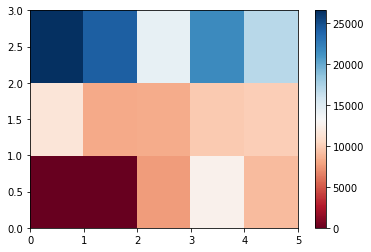

In [78]:
#PLOTTING A HEAT MAP
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

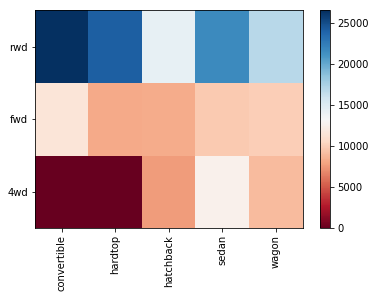

In [79]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

fig.colorbar(im)
plt.show()

In [80]:
# P VALUES

#WHEEL-BASE V/S PRICE
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "\nwith a P-value of P =", p_value)  

'''Conclusion:
Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, 
although the linear relationship isn't extremely strong (~0.585)'''

The Pearson Correlation Coefficient is 0.5891470005448702 
with a P-value of P = 4.4570195020502404e-20


"Conclusion:\nSince the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, \nalthough the linear relationship isn't extremely strong (~0.585)"

In [81]:
# HORSEPOWER V/S PRICE
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

'''Conclusion:
Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)'''

The Pearson Correlation Coefficient is 0.809656557536561  with a P-value of P =  1.0468839625927351e-47


'Conclusion:\nSince the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)'

In [82]:
#LENGTH V/S PRICE

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

'''Conclusion:
Since the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).'''

The Pearson Correlation Coefficient is 0.6910440897821903  with a P-value of P =  9.960963222348265e-30


'Conclusion:\nSince the p-value is  <  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).'

In [83]:
#WIDTH V/S PRICE

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

'''Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).'''

The Pearson Correlation Coefficient is 0.7527948631832608  with a P-value of P = 8.256714148308637e-38


'Conclusion:\nSince the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).'

In [84]:
# Curb-weight vs Price

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

'''Conclusion:
Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).'''

The Pearson Correlation Coefficient is 0.8344204348498463  with a P-value of P =  3.9699775360213322e-53


'Conclusion:\nSince the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).'

In [85]:
# Engine-size vs Price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521142  with a P-value of P = 1.897717146656218e-63


<h5>Conclusion:</h5>

Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [86]:
# Bore vs Price

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.207487524194635e-17


<h5>Conclusion:</h5>

Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [87]:
# City-mpg vs Price

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862686  with a P-value of P =  2.729256568479079e-29


<h5>Conclusion:</h5>

Since the p-value is  <  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

In [88]:
# Highway-mpg vs Price

pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7051147088046401  with a P-value of P =  2.1973260531584786e-31


<h5>Conclusion:</h5>

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

<h2 id="anova">ANOVA</h2>

In [89]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,16500.0
1,rwd,16500.0
2,fwd,13950.0
3,4wd,17450.0
4,fwd,15250.0
135,4wd,7603.0


In [90]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
5,fwd,sedan,17710.0
6,fwd,wagon,18920.0
7,fwd,sedan,23875.0
8,rwd,sedan,16430.0
9,rwd,sedan,16925.0


In [91]:
grouped_test2.get_group('4wd')['price']

3      17450.0
135     7603.0
139     9233.0
140    11259.0
143     8013.0
144    11694.0
149     7898.0
150     8778.0
Name: price, dtype: float64

In [92]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 68.49603532807176 , P = 2.6116313994533863e-23


#### Separately: fwd and rwd

In [93]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 131.59324661179534 , P = 1.7388247444783448e-23


#### 4wd and rwd

In [94]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.67069478113451 , P = 0.004232262975461328


<h4>4wd and fwd</h4>

In [95]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h4>Hence we can't consider drive wheel as a parameter too.</h4>

Therefore we are left with the following parameters: 

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

In [96]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,binned_hp,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,low,0,1


<h3>1. Linear Regression and Multiple Linear Regression</h3>

In [97]:
#If we try using linear regression then suppose we use highway-mpg and price

lm= LinearRegression()

X=df[['highway-mpg']]
Y=df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

In [99]:
print("lm.intercept_ = ", lm.intercept_)
print("lm.coef_ =", lm.coef_)

lm.intercept_ =  38470.63700549667
lm.coef_ = [-822.82843203]


In [100]:
#MULTIPLE LINEAR REGRESSION

In [101]:
lmr = LinearRegression()

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lmr.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
print("lm.intercept_ = ", lmr.intercept_)
print("lm.coef_ =", lmr.coef_)

lm.intercept_ =  -15794.35437120974
lm.coef_ = [53.5112049   4.70487452 81.53080659 35.87654175]


In [103]:
#VISUALIZATION

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48279.37680145622)

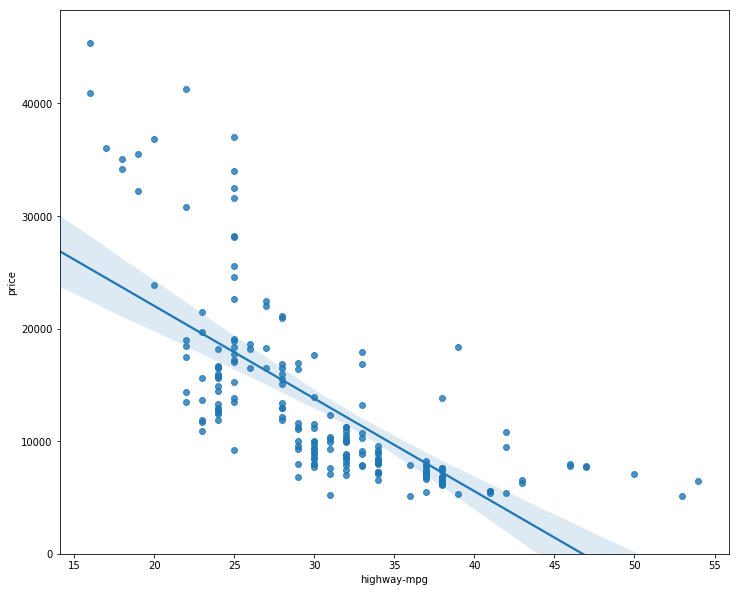

In [104]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.91836915011)

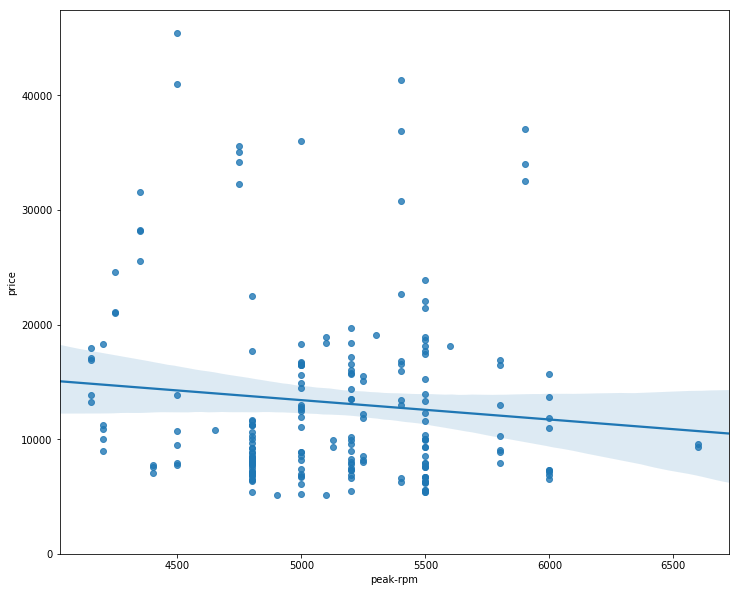

In [105]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [106]:
#The variable "peak-rpm" has a stronger correlation with "price", it is approximate -0.704692  compared to   "highway-mpg" which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.059319,-0.101593
highway-mpg,-0.059319,1.000000,-0.705115
price,-0.101593,-0.705115,1.000000


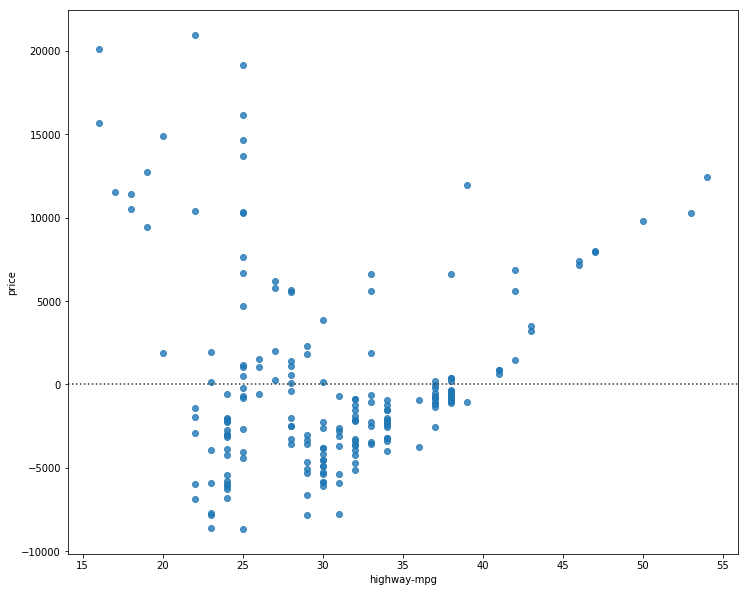

In [107]:
#RESIDUAL PLOT

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

In [108]:
#MULTIPLE LINEAR REGRESSION

In [109]:
Y_hat = lmr.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


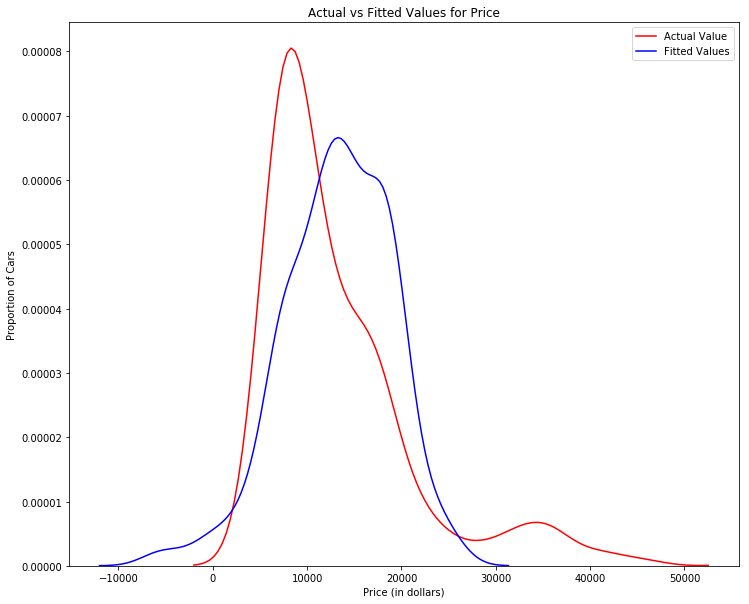

In [110]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

In [111]:
#POLYNOMIAL REGRESSION

In [112]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [113]:
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


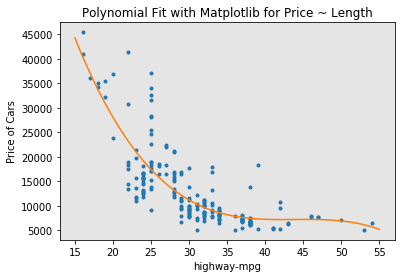

In [114]:
PlotPolly(p, x, y, 'highway-mpg')

In [115]:
np.polyfit(x, y, 3)

array([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


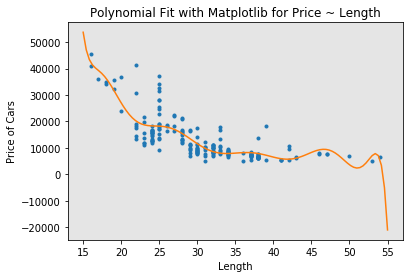

In [116]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Length')

In [117]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [118]:
Z_pr=pr.fit_transform(Z)

In [119]:
Z.shape

(200, 4)

In [120]:
Z_pr.shape

(200, 15)

<h2>Pipeline</h2>

In [121]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [122]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [123]:
pipe.fit(Z,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [124]:
ypipe=pipe.predict(Z)
ypipe[0:4]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13094.88646565, 18222.75956485, 10386.17943722, 16125.1447952 ])

In [125]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13701.08113673, 19053.70464401, 10622.23445554, 15523.47345497,
       13872.10183248, 15457.64454615, 15975.18074348, 17614.52358563,
       10724.19862453, 10724.19862453])

<h2>Part 4: Measures for In-Sample Evaluation</h2>

<h3>Model 1: Simple Linear Regression</h3>

In [126]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.49718675257265266


In [127]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16254.26934067 17077.0977727  13785.78404458 20368.41150083]


In [128]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31755395.41081296


<h3>Model 2: Multiple Linear Regression</h3>

In [129]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093753249041753


In [130]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  12038986.569462512


<h3>Model 3: Polynomial Fit</h3>

In [131]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6742706265540409


In [132]:
mean_squared_error(df['price'], p(x))

20571584.18879441

In [133]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [134]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37647.80857347, 36824.98014144, 36002.15170941, 35179.32327737,
       34356.49484534])

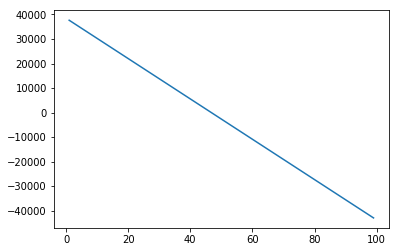

In [136]:
plt.plot(new_input, yhat)
plt.show()

In [137]:
# We realize that method with higher r squared value and smallest 
# MSE is the best method for prediction

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>

In [138]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    
    plt.close()

In [139]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [140]:
#training and testing, we split the data into testing and training

y_data = df['price']
x_data=df.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30
number of training samples: 170


In [141]:
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
lre.score(x_train[['horsepower']], y_train)

0.6554444765424261

In [143]:
lre.score(x_test[['horsepower']], y_test)

0.6301368205092763

In [144]:
#cross validation score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77474062, 0.5172957 , 0.74777703, 0.04701847])

In [145]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5217079546458679 and the standard deviation is 0.2917543177373881


In [146]:
#We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20648006.60031452, 43733821.19046848, 12543435.0168994 ,
       17587351.09090063])

In [147]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14142.23793549, 20815.3029844 , 12745.549902  , 14762.9881726 ,
       13987.05037621])

In [148]:
#Let's create Multiple linear regression objects and train the 
#model using 'horsepower', 'curb-weight', 'engine-size' and 
#'highway-mpg' as features.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [149]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 5444.66502021, 16042.64620811, 19151.34796331,  6813.69740103,
       21469.78728624])

In [150]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11127.33498458, 10422.74798693,  6456.00154948, 23343.9735911 ,
        9607.15346327])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


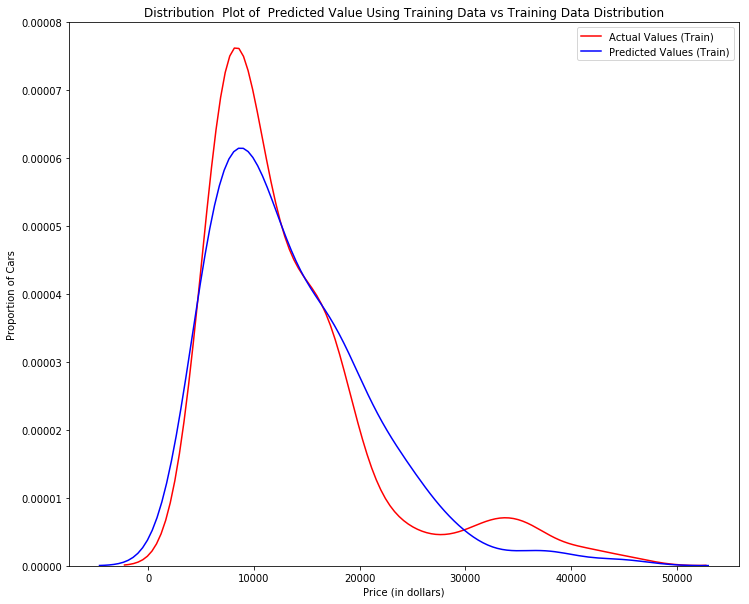

In [151]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

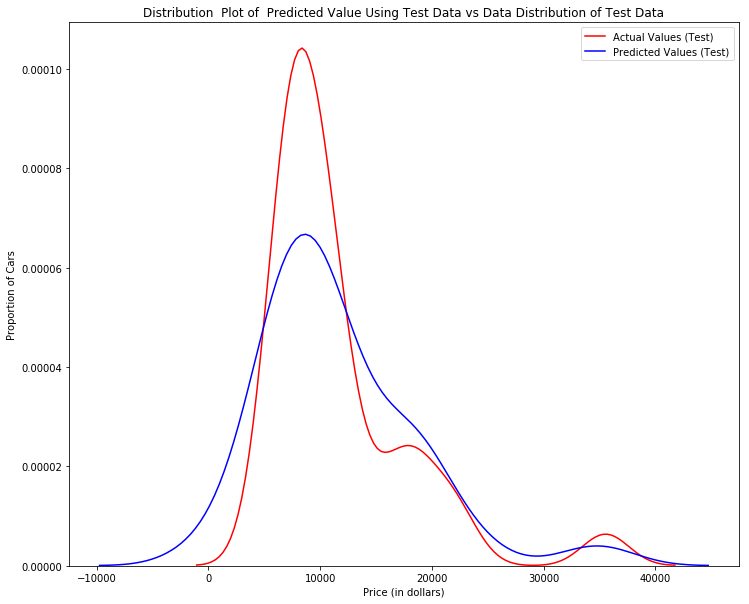

In [152]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [154]:
#overfitting

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [155]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [156]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 7194.66699567, 10350.09590707, 10991.65504095, 18578.7297168 ,
        3260.96959553])

In [158]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7194.66699567 10350.09590707 10991.65504095 18578.7297168 ]
True values: [ 6575.  9988. 15580. 14399.]


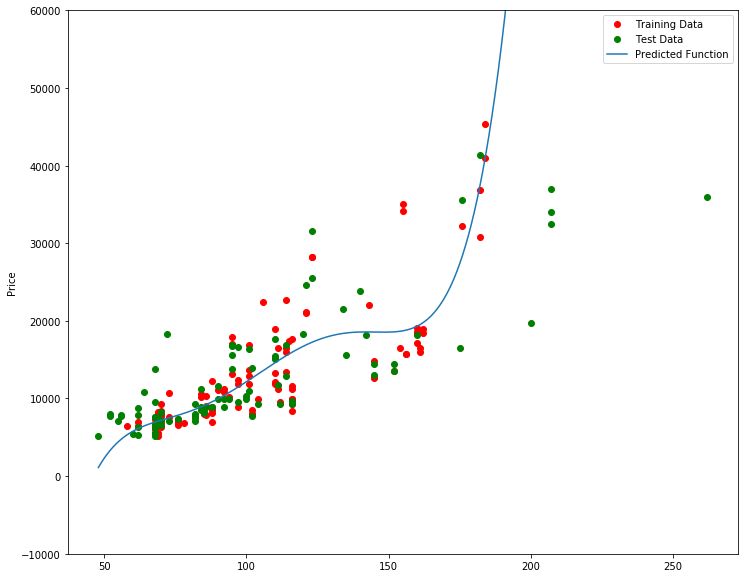

In [159]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [160]:
poly.score(x_train_pr, y_train)

0.7507740781447492

In [161]:
poly.score(x_test_pr, y_test)

-405.19027017426595

Text(3, 0.75, 'Maximum R^2 ')

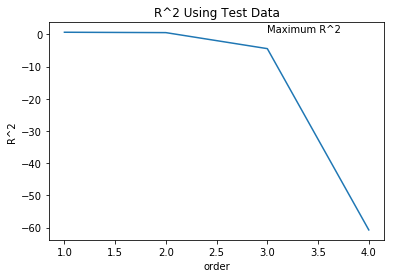

In [162]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [163]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [164]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2>Ridge regression</h2> 

In [165]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [167]:
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.161688e-17
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [168]:
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5931.86704981  9866.51807918 11579.09694796 24038.28023681]
test set : [ 6575.  9988. 15580. 14399.]


In [169]:
#We select the value of Alfa that minimizes the test error, for example, we can use a for loop.



Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

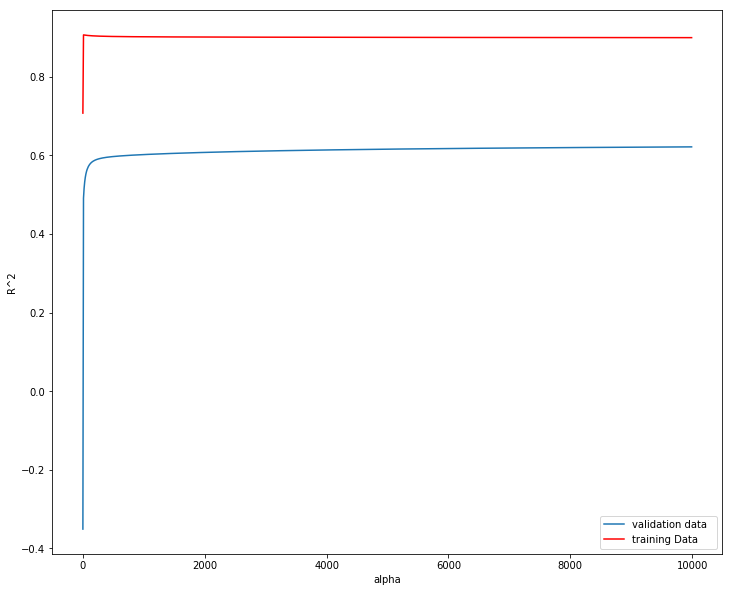

In [170]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h2>Grid Search</h2>

In [171]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [172]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [174]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [176]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.7767823923686877